# <center> Recommender System </center>

## Data Extraction

### Load data from CSV

Not using user data for a while

Data is generated randomly using Excel

In [29]:
import pandas as pd
import os

DATA_DIR = os.path.join("data/synt_data/")
INFLUENCER_FILE = os.path.join(DATA_DIR, "data_content_influencer_categ.csv")
OWNER_FILE = os.path.join(DATA_DIR, "data_content_owner_categ.csv")
HISTORY_FILE = os.path.join(DATA_DIR, "historical_data.csv")

df_influencer = pd.read_csv(INFLUENCER_FILE)
# df_owner = pd.read_csv(OWNER_FILE)
df_history = pd.read_csv(HISTORY_FILE)

### Data Exploration

In [30]:
df_influencer.head(5)

,id,insta_follower,tiktok,youtube,price_normalized,categories
0,1723,200630,116775,188693,0.723575,"Drama,Romance,School,Supernatural"
1,82,793665,549225,827288,0.896555,"Action,Adventure,Drama,Fantasy,Magic,Military,..."
2,296,114262,113731,107155,0.684796,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi..."
3,127,673572,548014,633078,0.817022,"Sci-Fi,Thriller"
4,137,151266,109278,75716,0.692096,"Action,Comedy,Historical,Parody,Samurai,Sci-Fi..."


In [31]:
df_influencer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6406 entries, 0 to 6405
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                6406 non-null   int64  
 1   insta_follower    6406 non-null   int64  
 2   tiktok            6406 non-null   int64  
 3   youtube           6406 non-null   int64  
 4   price_normalized  6406 non-null   float64
 5   categories        6406 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 300.4+ KB


In [32]:
df_influencer.describe()

,id,insta_follower,tiktok,youtube,price_normalized
count,6406.000000,6.406000e+03,6406.000000,6.406000e+03,6406.000000
mean,3505.326881,3.312034e+04,29526.596160,3.010190e+04,0.496720
std,2153.761090,7.193396e+04,65957.336585,6.844743e+04,0.068586
min,1.000000,4.300000e+01,36.000000,4.100000e+01,0.142142
25%,1607.250000,2.005500e+03,1612.000000,1.726250e+03,0.456907
50%,3312.500000,7.290500e+03,6249.000000,6.372500e+03,0.494965
75%,5384.750000,2.982525e+04,25697.500000,2.597200e+04,0.533565
max,7387.000000,1.013917e+06,805312.000000,1.188454e+06,0.897800


In [33]:
df_history.head(5)

,own_id,inf_id,star_rating,sentiment_rating
0,1,1,4,0.874921
1,1,3,3,0.566991
2,1,5,5,0.945937
3,1,6,5,0.832950
4,1,7,4,0.826545


In [34]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413446 entries, 0 to 413445
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   own_id            413446 non-null  int64  
 1   inf_id            413446 non-null  int64  
 2   star_rating       413446 non-null  int64  
 3   sentiment_rating  413446 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 12.6 MB


In [35]:
df_history.describe()

,own_id,inf_id,star_rating,sentiment_rating
count,413446.000000,413446.000000,413446.000000,413446.000000
mean,2443.219533,1076.748458,4.141170,0.777523
std,1438.596784,1148.850785,0.789503,0.161688
min,1.000000,1.000000,1.000000,0.000450
25%,1214.000000,260.000000,4.000000,0.679722
50%,2456.000000,639.000000,4.000000,0.791544
75%,3699.000000,1532.000000,5.000000,0.900134
max,5000.000000,7385.000000,5.000000,1.000000


## Data Transformation

### Data cleaning

#### Missing value

In [36]:
df_influencer.isnull().sum()

id                  0
insta_follower      0
tiktok              0
youtube             0
price_normalized    0
categories          0
dtype: int64

In [37]:
df_history.isnull().sum()

own_id              0
inf_id              0
star_rating         0
sentiment_rating    0
dtype: int64

No missing value

#### Irrelevant Data / Invalid Data

Check if all history has valid influencer and owner ID

In [38]:
df_history["inf_id"].isin(df_influencer["id"]).all()

True

All history data has valid influencer and owner ID

### Data Normalization

Normalize influencer data: Scale follower count and One-hot categories

In [39]:
from sklearn.preprocessing import MinMaxScaler

follower_scaler = MinMaxScaler()

df_inf_norm = df_influencer.copy()
df_inf_norm[["insta_follower", "tiktok", "youtube"]] = follower_scaler.fit_transform(df_inf_norm[["insta_follower", "tiktok", "youtube"]])

one_hot_categories = df_inf_norm['categories'].str.get_dummies(sep=',')
df_inf_norm = pd.concat([df_inf_norm, one_hot_categories], axis=1)
df_inf_norm = df_inf_norm.drop('categories', axis=1)
df_inf_norm.head()

,id,insta_follower,tiktok,youtube,price_normalized,Action,Adventure,Cars,Comedy,Dementia,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1723,0.197842,0.144968,0.158743,0.723575,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,82,0.782762,0.681989,0.696094,0.896555,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,296,0.112656,0.141188,0.090132,0.684796,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,127,0.664312,0.680485,0.532674,0.817022,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,137,0.149154,0.135658,0.063677,0.692096,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


Remove some category

In [40]:
categories_count = df_inf_norm[df_inf_norm.columns[5:]].sum().sort_values(ascending=False)

column_name = list(categories_count.nlargest(10).index)
column_name
# plt.plot

['Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Fantasy',
 'Drama',
 'Shounen',
 'Romance',
 'School',
 'Supernatural']

Combine star and sentiment rating

In [41]:
STAR_WEIGHT = 0.6
SENTIMENT_WEIGHT = 0.4

df_history["combined_rating"] = STAR_WEIGHT * df_history["star_rating"] / 5 + SENTIMENT_WEIGHT * df_history["sentiment_rating"]
df_history

,own_id,inf_id,star_rating,sentiment_rating,combined_rating
0,1,1,4,0.874921,0.829968
1,1,3,3,0.566991,0.586796
2,1,5,5,0.945937,0.978375
3,1,6,5,0.832950,0.933180
4,1,7,4,0.826545,0.810618
...,...,...,...,...,...
413441,4999,49,5,0.987383,0.994953
413442,4999,670,5,0.823814,0.929526
413443,4999,62,5,0.985877,0.994351
413444,4999,770,5,0.847512,0.939005


In [42]:
rating_count = df_history.groupby("star_rating").count()
rating_count

,own_id,inf_id,sentiment_rating,combined_rating
star_rating,,,,
1,2768,2768,2768,2768
2,9217,9217,9217,9217
3,59531,59531,59531,59531
4,197295,197295,197295,197295
5,144635,144635,144635,144635


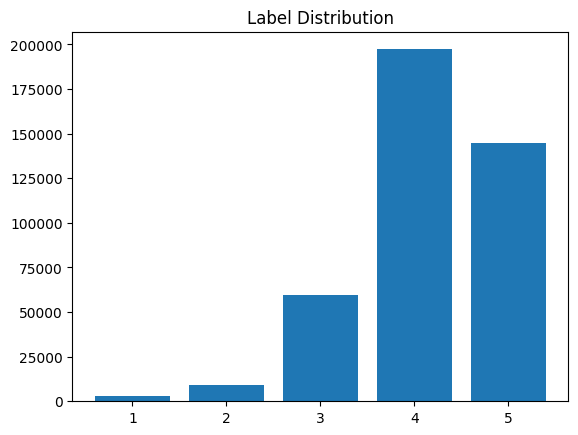

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Chart labels
rating_count = rating_count["own_id"].to_numpy()
ratings = range(1, 6)

# Show pie chart
plt.title("Label Distribution")
plt.bar(x=ratings, height=rating_count)
plt.show()

### Data Splitting

##### Creating user profile

In [44]:
df_history = df_history.drop(["star_rating", "sentiment_rating"], axis=1)
df_inf_features = pd.merge(df_history, df_inf_norm, left_on='inf_id', right_on='id', how='left')
df_inf_features.head()

,own_id,inf_id,combined_rating,id,insta_follower,tiktok,youtube,price_normalized,Action,Adventure,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1,1,0.829968,1,0.125135,0.165684,0.059806,0.552815,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,0.586796,3,0.115435,0.113069,0.121231,0.523593,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,5,0.978375,5,0.123297,0.079398,0.116411,0.567288,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,6,0.933180,6,1.000000,0.917396,1.000000,0.885963,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,7,0.810618,7,0.558893,0.816575,0.273925,0.743871,0,0,...,0,0,0,1,0,0,0,1,0,0


In [45]:
OWNER_FEATURES = df_inf_norm.columns[1:]

# Copy influencer features combined with history data
df_own_norm = df_inf_features.copy()

# Multiply influencer feature with user rating
df_own_norm[OWNER_FEATURES] = df_own_norm[OWNER_FEATURES].mul(df_own_norm['combined_rating'], axis=0) 

# Drop unimportant features
df_own_norm = df_own_norm.drop(["inf_id", "id", "combined_rating"], axis=1)

# Average those with same owner id to make user profile
df_own_norm = df_own_norm.groupby('own_id').mean().reset_index()
df_own_norm.rename(columns={'own_id': 'id'}, inplace=True)

df_own_norm.head()

,id,insta_follower,tiktok,youtube,price_normalized,Action,Adventure,Cars,Comedy,Dementia,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1,0.352823,0.391165,0.331168,0.567565,0.305718,0.000000,0.0,0.378894,0.000000,...,0.000000,0.000000,0.000000,0.440502,0.000000,0.000000,0.000000,0.433822,0.116648,0.000000
1,2,0.158099,0.175593,0.123178,0.530405,0.371776,0.182430,0.0,0.411511,0.000000,...,0.001821,0.284818,0.017921,0.145206,0.005486,0.059535,0.085750,0.242935,0.021721,0.029861
2,3,0.245410,0.266718,0.189852,0.569258,0.257950,0.221131,0.0,0.526102,0.000000,...,0.000000,0.152354,0.000000,0.110324,0.000000,0.000000,0.078083,0.189823,0.023135,0.000000
3,4,0.324875,0.345335,0.267903,0.556314,0.625353,0.262050,0.0,0.386566,0.000000,...,0.018430,0.312997,0.000000,0.000000,0.000000,0.000000,0.209607,0.386761,0.067929,0.043189
4,5,0.241607,0.265332,0.186912,0.527479,0.283753,0.139095,0.0,0.432224,0.006247,...,0.006990,0.134209,0.051474,0.221372,0.000000,0.021484,0.054920,0.270381,0.084208,0.027801


##### Process feature and label

In [46]:
# Remove ID and labels
df_inf_features = df_inf_features.drop(["own_id", "inf_id", "id", "combined_rating"], axis=1)
INFLUENCER_FEATURE_COUNT = len(df_inf_features.columns)

df_inf_features.head()

,insta_follower,tiktok,youtube,price_normalized,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,0.125135,0.165684,0.059806,0.552815,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.115435,0.113069,0.121231,0.523593,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.123297,0.079398,0.116411,0.567288,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1.000000,0.917396,1.000000,0.885963,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0.558893,0.816575,0.273925,0.743871,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0


In [47]:
# Join history and owner data by own_id
df_own_features = pd.merge(df_history, df_own_norm, left_on='own_id', right_on='id', how='left')

df_own_features.head()

,own_id,inf_id,combined_rating,id,insta_follower,tiktok,youtube,price_normalized,Action,Adventure,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,1,1,0.829968,1,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
1,1,3,0.586796,1,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
2,1,5,0.978375,1,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
3,1,6,0.933180,1,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
4,1,7,0.810618,1,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0


In [48]:
# Remove ID and labels
df_own_features = df_own_features.drop(["own_id", "inf_id", "id", "combined_rating"], axis=1)
OWNER_FEATURE_COUNT = len(df_own_features.columns)

df_own_features.head()

,insta_follower,tiktok,youtube,price_normalized,Action,Adventure,Cars,Comedy,Dementia,Demons,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
0,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,0.0,0.378894,0.0,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
1,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,0.0,0.378894,0.0,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
2,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,0.0,0.378894,0.0,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
3,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,0.0,0.378894,0.0,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0
4,0.352823,0.391165,0.331168,0.567565,0.305718,0.0,0.0,0.378894,0.0,0.0,...,0.0,0.0,0.0,0.440502,0.0,0.0,0.0,0.433822,0.116648,0.0


In [49]:
# Get labels from history data
df_labels = df_history["combined_rating"]
df_labels.head()

0    0.829968
1    0.586796
2    0.978375
3    0.933180
4    0.810618
Name: combined_rating, dtype: float64

##### Generate train, validation, and test dataset

In [50]:
# Shuffle and batch data
import tensorflow as tf

SHUFFLE_BUFFER = 1000

dataset = tf.data.Dataset.from_tensor_slices(({"inf_feature": df_inf_features, "own_feature": df_own_features}, df_labels))
dataset = dataset.shuffle(SHUFFLE_BUFFER) 

dataset.element_spec

({'inf_feature': TensorSpec(shape=(44,), dtype=tf.float64, name=None),
  'own_feature': TensorSpec(shape=(44,), dtype=tf.float64, name=None)},
 TensorSpec(shape=(), dtype=tf.float64, name=None))

In [51]:
# Generate training, validation, and testing data
DATASET_SIZE = dataset.cardinality().numpy()
TRAIN_SIZE = int(DATASET_SIZE * 0.8)
VAL_SIZE = int(DATASET_SIZE * 0.1)
TEST_SIZE = DATASET_SIZE - TRAIN_SIZE - VAL_SIZE

train_dataset = dataset.take(TRAIN_SIZE)
val_dataset = dataset.skip(TRAIN_SIZE).take(VAL_SIZE)
test_dataset = dataset.skip(TRAIN_SIZE + VAL_SIZE).take(TEST_SIZE)

print(f"Training dataset has {train_dataset.cardinality().numpy()} data")
print(f"Validation dataset has {val_dataset.cardinality().numpy()} data")
print(f"Testing dataset has {test_dataset.cardinality().numpy()} data")

Training dataset has 330756 data
Validation dataset has 41344 data
Testing dataset has 41346 data


In [52]:
# Batching
BATCH_SIZE = 128
REPEAT = 2

train_dataset = train_dataset.batch(BATCH_SIZE).repeat(REPEAT)
val_dataset = val_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

## Creating Model

Model consists of two neural networks that would be combined with Dot layer. The first neural network has influencer features as input and a vector as an output. The second one has owner features as input and a vector as an output. These two vectors will be combined with Dot layer and produces a single combined rating

In [53]:
VECTOR_SIZE = 128
# tf.random.set_seed(1)

model_influencer = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=VECTOR_SIZE, activation='linear'),
])

# create the influencer input and point to the base network
input_influencer = tf.keras.layers.Input(shape=(INFLUENCER_FEATURE_COUNT), name="inf_feature")
vi = model_influencer(input_influencer)
vi = tf.linalg.l2_normalize(vi, axis=1)

model_owner = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=VECTOR_SIZE, activation='linear'),
])

# create the owner input and point to the base network
input_owner = tf.keras.layers.Input(shape=(OWNER_FEATURE_COUNT), name="own_feature")
vo = model_owner(input_owner)
vo = tf.linalg.l2_normalize(vo, axis=1)

# compute the dot product of the two vectors vi and vo
output = tf.keras.layers.Dot(axes=1)([vi, vo])

# specify the inputs and output of the model
model = tf.keras.Model([input_influencer, input_owner], output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inf_feature (InputLayer)       [(None, 44)]         0           []                               
                                                                                                  
 own_feature (InputLayer)       [(None, 44)]         0           []                               
                                                                                                  
 sequential (Sequential)        (None, 128)          102080      ['inf_feature[0][0]']            
                                                                                                  
 sequential_1 (Sequential)      (None, 128)          102080      ['own_feature[0][0]']            
                                                                                              

In [54]:
LEARNING_RATE = 1e-3

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), 
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=["mse"])

model.fit(train_dataset, validation_data=val_dataset, epochs=20)

Epoch 1/20
5170/5170 [==============================] - 21s 4ms/step - loss: 0.0986 - mse: 0.0171 - val_loss: 0.0959 - val_mse: 0.0164
Epoch 2/20
5170/5170 [==============================] - 20s 4ms/step - loss: 0.0933 - mse: 0.0158 - val_loss: 0.0947 - val_mse: 0.0162
Epoch 3/20
5170/5170 [==============================] - 20s 4ms/step - loss: 0.0919 - mse: 0.0156 - val_loss: 0.1001 - val_mse: 0.0185
Epoch 4/20
5170/5170 [==============================] - 20s 4ms/step - loss: 0.0909 - mse: 0.0154 - val_loss: 0.0968 - val_mse: 0.0176
Epoch 5/20
5170/5170 [==============================] - 20s 4ms/step - loss: 0.0902 - mse: 0.0153 - val_loss: 0.0962 - val_mse: 0.0174
Epoch 6/20
5170/5170 [==============================] - 20s 4ms/step - loss: 0.0897 - mse: 0.0152 - val_loss: 0.0968 - val_mse: 0.0175
Epoch 7/20
5170/5170 [==============================] - 21s 4ms/step - loss: 0.0894 - mse: 0.0151 - val_loss: 0.0919 - val_mse: 0.0157
Epoch 8/20
5170/5170 [==============================] -

In [55]:
test_predict = model.predict(test_dataset)
test_predict

324/324 [==============================] - 2s 2ms/step


array([[0.7723899 ],
       [0.81192917],
       [0.7696002 ],
       ...,
       [0.78051436],
       [0.8129976 ],
       [0.68705285]], dtype=float32)

In [56]:
# Get real label
labels = np.array([])
for batch in test_dataset:
    labels = np.concatenate([labels, batch[1].numpy()])

labels

array([0.75973512, 0.55135767, 0.77563687, ..., 0.79744253, 0.77956229,
       0.81147027])

In [57]:
compare = pd.concat([pd.DataFrame(test_predict, columns=["predicted"]), 
                     pd.DataFrame(labels, columns=["real"])], axis=1)

compare["error"] = abs(compare["predicted"] - compare["real"])

compare

,predicted,real,error
0,0.772390,0.759735,0.012655
1,0.811929,0.551358,0.260571
2,0.769600,0.775637,0.006037
3,0.948528,0.798951,0.149578
4,0.825799,0.774158,0.051641
...,...,...,...
41341,0.976412,0.577672,0.398740
41342,0.979496,0.928056,0.051441
41343,0.780514,0.797443,0.016928
41344,0.812998,0.779562,0.033435


In [58]:
compare[compare["error"] >= 5e-1]

,predicted,real,error
22,0.403197,0.984086,0.580888
49,0.945195,0.417641,0.527554
91,0.739302,0.206268,0.533034
387,0.958825,0.373546,0.585280
399,0.414497,0.969478,0.554981
...,...,...,...
40917,0.945212,0.186137,0.759075
40939,0.824049,0.184246,0.639803
40959,0.978027,0.367193,0.610834
41073,0.953613,0.195025,0.758588


In [65]:
bins = [0, 0.25, 0.5, 0.75, 1]
bucketized = compare.copy()
bucketized['bucket'] = pd.cut(bucketized['real'], bins=bins)
counts = bucketized[bucketized['error'] > 0.5]['bucket'].value_counts()

counts

(0.25, 0.5]    172
(0.0, 0.25]    155
(0.75, 1.0]     21
(0.5, 0.75]      0
Name: bucket, dtype: int64